## Тема “Обучение без учителя”
выполнил Колеганов Николай Дмитриевич

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()
data = boston["data"]
print("Ключи в данных: \n",boston.keys())

Ключи в данных: 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print("Размер данных: \n",data.shape)

Размер данных: 
 (506, 13)


In [4]:
feature_names = boston["feature_names"]
print("Название колонок: \n", feature_names)

Название колонок: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Создайте датафреймы X и y из этих данных. 

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
print("Сами данные в таблице\n")
X.head()

Сами данные в таблице



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print("Размеры получившихся тренировочных данных: ", X_train.shape, "Размеры тренировочных ответов: ", y_train.shape)
print("Размеры получившихся тестовых данных: ", X_test.shape, "Размеры тестовых ответов: ", y_test.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Содержание получившихся тренировочных данных: \n", X_train.head())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Содержание получившихся тестовых данных: \n", X_test.head())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Размеры получившихся тренировочных данных:  (404, 13) Размеры тренировочных ответов:  (404,)
Размеры получившихся тестовых данных:  (102, 13) Размеры тестовых ответов:  (102,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Содержание получившихся тренировочных данных: 
          CRIM    ZN  INDUS  CHAS     NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
477  15.02340   0.0  18.10   0.0  0.6140  ...  24.0  666.0     20.2  349.48  24.91
15    0.62739   0.0   8.14   0.0  0.5380  ...   4.0  307.0     21.0  395.62   8.47
332   0.03466  35.0   6.06   0.0  0.4379  ...   1.0  304.0     16.9  362.25   7.83
423   7.05042   0.0  18.10   0.0  0.6140  ...  24.0  666.0     20.2    2.52  23.29
19    0.72580   0.0   8.14   0.0  0.5380  ...   4.0  307.0     21.0  390.95  11.28

[5 rows x 13 columns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Содержание получившихся тестовых данных: 
         CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...   5.0  296.0     16

Масштабируйте данные с помощью StandardScaler.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
print("После маштабирования\n")
print("Размеры получившихся тренировочных данных: ", X_train_scaled.shape, "Размеры тренировочных ответов: ", y_train.shape)
print("Размеры получившихся тестовых данных: ", X_test_scaled.shape, "Размеры тестовых ответов: ", y_test.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Содержание получившихся тренировочных данных: \n", X_train_scaled.head())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Содержание получившихся тестовых данных: \n", X_test_scaled.head())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

После маштабирования

Размеры получившихся тренировочных данных:  (404, 13) Размеры тренировочных ответов:  (404,)
Размеры получившихся тестовых данных:  (102, 13) Размеры тестовых ответов:  (102,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Содержание получившихся тренировочных данных: 
        CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  1.287702 -0.500320  1.033237  ...  0.845343 -0.074337  1.753505
1 -0.336384 -0.500320 -0.413160  ...  1.204741  0.430184 -0.561474
2 -0.403253  1.013271 -0.715218  ... -0.637176  0.065297 -0.651595
3  0.388230 -0.500320  1.033237  ...  0.845343 -3.868193  1.525387
4 -0.325282 -0.500320 -0.413160  ...  1.204741  0.379119 -0.165787

[5 rows x 13 columns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Содержание получившихся тестовых данных: 
        CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.396809 -0.500320 -1.007111  ... -0.771951  0.428872 -0.481210
1 -0.400796  1.229499 -0.664391  ... -0.322703  0.444180 -1.257094
2 -0.395234 -0.50

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

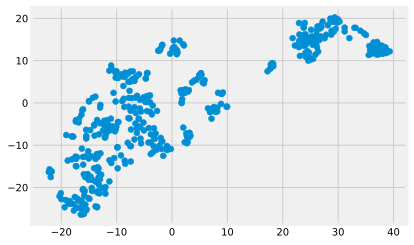

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


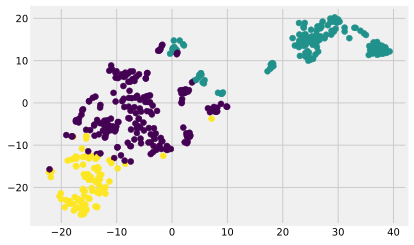

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

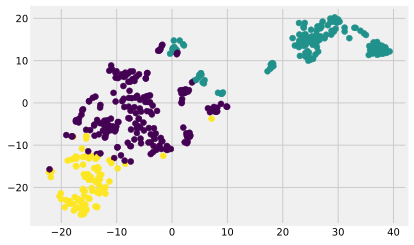

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

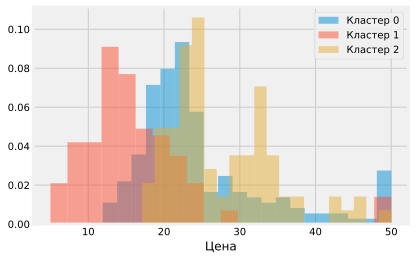

In [15]:
# И гистограмму распределения
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [0]:
labels_test = kmeans.predict(X_test_scaled)

In [17]:
CRIM_1 = X_train.loc[labels_train == 0, 'CRIM'].mean()
CRIM_2 = X_train.loc[labels_train == 1, 'CRIM'].mean()
CRIM_3 = X_train.loc[labels_train == 2, 'CRIM'].mean()

print(f'''Среднее значение: {y_train.mean()},
Среднее значение по кластеру 1: {y_train[labels_train == 0].mean()},
Среднее значение по кластеру 2: {y_train[labels_train == 1].mean()},
Среднее значение по кластеру 3: {y_train[labels_train == 2].mean()},
CRIM по кластеру 1: {CRIM_1},
CRIM по кластеру 2: {CRIM_2},
CRIM по кластеру 3: {CRIM_3}''')

Среднее значение: 22.796534653465343,
Среднее значение по кластеру 1: 24.958115183246072,
Среднее значение по кластеру 2: 16.165354330708663,
Среднее значение по кластеру 3: 27.78837209302326,
CRIM по кластеру 1: 0.42166020942408367,
CRIM по кластеру 2: 10.797028425196853,
CRIM по кластеру 3: 0.07356558139534886


## * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [0]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [0]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

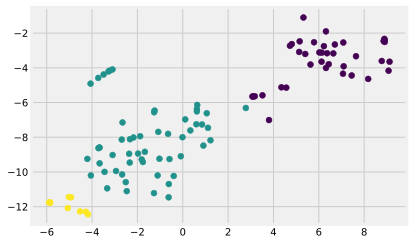

In [20]:
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [21]:
print('Первый кластер: ', X_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][labels_test== 1].mean())
print('Третий кластер:', X_test['CRIM'][labels_test== 2].mean())

Первый кластер:  9.419181842105264
Второй кластер: 0.21929690909090907
Третий кластер: 0.04070333333333334
